In [1]:
import nltk
import re
import pandas as pd
import numpy as np
#导入nltk自然语言处理、re正则表达式替换

In [2]:
local_data = 'Text_Data.xlsx'
raw = pd.read_excel(local_data,header=0)
#读取csv文件

In [3]:
raw[["title"]] = raw[["title"]].astype(str)
raw[["content"]] = raw[["content"]].astype(str)
raw.head()
#将txt转为str格式（貌似默认是一个bytes格式）

,title,date,link,content,source
0,Syria Humanitarian Crisis Grabs Attention,2014-01-25,http://blogs.wsj.com/davos/2014/01/25/syria-hu...,?Syria’s mounting humanitarian crisis is turni...,HEJ
1,Saudi Prince Turki: U.S. Must Lead U.N. Effort...,2014-01-24,http://blogs.wsj.com/davos/2014/01/24/saudi-pr...,A former Saudi intelligence chief Friday reviv...,HEJ
2,"At Davos, Mary J. Blige Tops Google's Invite List",2014-01-23,http://blogs.wsj.com/davos/2014/01/23/at-davos...,"When you have roughly $50 billion in cash, you...",HEJ
3,Abe Puts Shrine Spat Down to Misunderstanding,2014-01-23,http://blogs.wsj.com/davos/2014/01/23/abe-puts...,"It’s all a big misunderstanding, Japanese Prim...",HEJ
4,Japan's Abe Defends Yasukuni Shrine Visit,2014-01-22,http://blogs.wsj.com/davos/2014/01/22/japans-a...,Japanese Prime Minister Shinzo Abe defended hi...,HEJ


In [4]:
def restore_str(new_text):
    # to find the 's following the pronouns. re.I is refers to ignore case
    pat_is = re.compile("(it|he|she|that|this|there|here|China)(\’s)", re.I)
    # to find the 's following the letters
    pat_s = re.compile("(?<=[a-zA-Z])\’s")
    # to find the ' following the words ending by s
    pat_s2 = re.compile("(?<=s)\’s?")
    # to find the abbreviation of not
    pat_not = re.compile("(?<=[a-zA-Z])n\’t")
    # to find the abbreviation of would
    pat_would = re.compile("(?<=[a-zA-Z])\’d")
    # to find the abbreviation of will
    pat_will = re.compile("(?<=[a-zA-Z])\’ll")
    # to find the abbreviation of am
    pat_am = re.compile("(?<=[I|i])\’m")
    # to find the abbreviation of are
    pat_are = re.compile("(?<=[a-zA-Z])\’re")
    # to find the abbreviation of have
    pat_ve = re.compile("(?<=[a-zA-Z])\’ve")
    new_text = pat_is.sub(r"\1 is", new_text)
    new_text = pat_s.sub("", new_text)
    new_text = pat_s2.sub("", new_text)
    new_text = pat_not.sub(" not", new_text)
    new_text = pat_would.sub(" would", new_text)
    new_text = pat_will.sub(" will", new_text)
    new_text = pat_am.sub(" am", new_text)
    new_text = pat_are.sub(" are", new_text)
    new_text = pat_ve.sub(" have", new_text)
    new_text = new_text.replace('\'', ' ')
    #将's等还原
    return new_text

In [5]:
def clean_str(new_text):
    pat_letter = re.compile(r'[^a-zA-Z \']+')
    new_text = pat_letter.sub(' ', new_text).strip().lower()
    #替换掉标点符号
    pat_b2 = re.compile('u k')
    new_text = pat_b2.sub('u.k',new_text).strip().lower()
    pat_b3 = re.compile('u s')
    new_text = pat_b3.sub('u.s',new_text).strip().lower()
    #将us uk等还原为u.s u.k
    return new_text

In [6]:
#先将文章标题中的's等都还原
tem = []
raw1 = raw.copy()
for column in raw["title"]:
    tem.append(restore_str(column))
raw["title"] = tem

In [7]:
#再将文章段落中的's等都还原
tem = []
raw2 = raw.copy()
for column in raw["content"]:
    tem.append(restore_str(column))
raw["content"] = tem

In [8]:
raw.head()

,title,date,link,content,source
0,Syria Humanitarian Crisis Grabs Attention,2014-01-25,http://blogs.wsj.com/davos/2014/01/25/syria-hu...,?Syria mounting humanitarian crisis is turning...,HEJ
1,Saudi Prince Turki: U.S. Must Lead U.N. Effort...,2014-01-24,http://blogs.wsj.com/davos/2014/01/24/saudi-pr...,A former Saudi intelligence chief Friday reviv...,HEJ
2,"At Davos, Mary J. Blige Tops Google s Invite List",2014-01-23,http://blogs.wsj.com/davos/2014/01/23/at-davos...,"When you have roughly $50 billion in cash, you...",HEJ
3,Abe Puts Shrine Spat Down to Misunderstanding,2014-01-23,http://blogs.wsj.com/davos/2014/01/23/abe-puts...,"It is all a big misunderstanding, Japanese Pri...",HEJ
4,Japan s Abe Defends Yasukuni Shrine Visit,2014-01-22,http://blogs.wsj.com/davos/2014/01/22/japans-a...,Japanese Prime Minister Shinzo Abe defended hi...,HEJ


In [9]:
#按照\n拆分段落，返回包含china或chinese的段落
def chose_chin(text):
    new_text = ""
    content_str = text
    ss = content_str.split("\n")
    for s in ss:
        if 'China' in s or 'Chinese' in s:
            new_text += s
    return new_text

In [12]:
#对标题中不含China、Chinese的段落进行筛选，只留下带China、Chinese的段落
tem = []
raw3 = raw.copy()
for row in raw.itertuples(index=True, name='Pandas'):
    if "China" not in getattr(row, "title") and "Chinese" not in getattr(row, "title"):
        tem.append(chose_chin(getattr(row,"content")))
    else:
        tem.append(getattr(row,"content"))
raw["content"] = tem

In [13]:
raw

,title,date,link,content,source
0,Syria Humanitarian Crisis Grabs Attention,2014-01-25,http://blogs.wsj.com/davos/2014/01/25/syria-hu...,,HEJ
1,Saudi Prince Turki: U.S. Must Lead U.N. Effort...,2014-01-24,http://blogs.wsj.com/davos/2014/01/24/saudi-pr...,,HEJ
2,"At Davos, Mary J. Blige Tops Google s Invite List",2014-01-23,http://blogs.wsj.com/davos/2014/01/23/at-davos...,,HEJ
3,Abe Puts Shrine Spat Down to Misunderstanding,2014-01-23,http://blogs.wsj.com/davos/2014/01/23/abe-puts...,,HEJ
4,Japan s Abe Defends Yasukuni Shrine Visit,2014-01-22,http://blogs.wsj.com/davos/2014/01/22/japans-a...,“I had no intention whatsoever to hurt the fee...,HEJ
5,Iran President Aims to Meet Western Oil Execut...,2014-01-22,http://blogs.wsj.com/davos/2014/01/22/iran-pre...,,HEJ
6,SkyBridge Founder Sees Growth in Activist Inve...,2014-01-22,http://blogs.wsj.com/davos/2014/01/22/skybridg...,,HEJ
7,Davos in 15 Minutes: What Did You Miss?,2013-01-28,http://blogs.wsj.com/davos/2013/01/28/davos-re...,,HEJ
8,BOE s Inflation-Targeting Preacher Turns Convert,2013-01-26,http://blogs.wsj.com/davos/2013/01/26/boes-inf...,,HEJ
9,Happy Bankers Sound a Cautious Note,2013-01-25,http://blogs.wsj.com/davos/2013/01/25/happy-ba...,,HEJ


In [14]:
#删除内容为空的段落，因为这些段落就是“标题”和“段落中”均不含China或Chinese的
raw4 = raw.copy()
raw = raw[raw.content != ""]

In [15]:
#重新生成连续的索引
raw["index"] = range(raw.shape[0])
raw

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,date,link,content,source,index
4,Japan s Abe Defends Yasukuni Shrine Visit,2014-01-22,http://blogs.wsj.com/davos/2014/01/22/japans-a...,“I had no intention whatsoever to hurt the fee...,HEJ,0
11,Shanghai Regulator: Wealth-Management Products...,2013-01-25,http://blogs.wsj.com/davos/2013/01/25/shanghai...,"DAVOS, Switzerland—Wealth-management products ...",HEJ,1
18,Kazakh Banker Wedged in Dollar-Yuan Conflict,2011-01-26,http://blogs.wsj.com/davos/2011/01/26/kazakh-b...,The head of Kazakhstan central bank is no less...,HEJ,2
30,Rethinking Tiger Education,2011-01-26,http://blogs.wsj.com/davos/2011/01/26/tiger-ed...,Chinese real estate mogul Zhang Xin told a pac...,HEJ,3
32,Deloitte Plans Investment in High-Growth Markets,2011-01-25,http://blogs.wsj.com/davos/2011/01/25/deloitte...,"Those markets include China, India, Brazil, So...",HEJ,4
34,"Thinking Local, Acting Global",2010-02-03,/articles/SB1000142405274870409430457502903181...,A cabinet from Malaysia sits alongside face ma...,HEJ,5
36,Banker Bashing Masks Rise of China,2010-02-03,/articles/SB1000142405274870410720457503901397...,"May 30, 2018\r\nThe two main themes at the Wor...",HEJ,6
44,Google s Eric Schmidt: We d Very Much Like to...,2010-01-29,http://blogs.wsj.com/davos/2010/01/29/googles-...,Google Chairman and CEO Eric Schmidt declined ...,HEJ,7
53,Head of Chinese State-Owned Enterprise Lecture...,2010-01-27,http://blogs.wsj.com/davos/2010/01/27/head-of-...,In a rather bizarre and ironic display of Chin...,HEJ,8
57,"Value of Stable Yuan Could Be Higher, Frank ...",2010-01-27,http://blogs.wsj.com/davos/2010/01/27/value-of...,When asked about the value of the Chinese yuan...,HEJ,9


In [16]:
raw = raw.set_index("index")

In [17]:
raw

,title,date,link,content,source
index,,,,,
0,Japan s Abe Defends Yasukuni Shrine Visit,2014-01-22,http://blogs.wsj.com/davos/2014/01/22/japans-a...,“I had no intention whatsoever to hurt the fee...,HEJ
1,Shanghai Regulator: Wealth-Management Products...,2013-01-25,http://blogs.wsj.com/davos/2013/01/25/shanghai...,"DAVOS, Switzerland—Wealth-management products ...",HEJ
2,Kazakh Banker Wedged in Dollar-Yuan Conflict,2011-01-26,http://blogs.wsj.com/davos/2011/01/26/kazakh-b...,The head of Kazakhstan central bank is no less...,HEJ
3,Rethinking Tiger Education,2011-01-26,http://blogs.wsj.com/davos/2011/01/26/tiger-ed...,Chinese real estate mogul Zhang Xin told a pac...,HEJ
4,Deloitte Plans Investment in High-Growth Markets,2011-01-25,http://blogs.wsj.com/davos/2011/01/25/deloitte...,"Those markets include China, India, Brazil, So...",HEJ
5,"Thinking Local, Acting Global",2010-02-03,/articles/SB1000142405274870409430457502903181...,A cabinet from Malaysia sits alongside face ma...,HEJ
6,Banker Bashing Masks Rise of China,2010-02-03,/articles/SB1000142405274870410720457503901397...,"May 30, 2018\r\nThe two main themes at the Wor...",HEJ
7,Google s Eric Schmidt: We d Very Much Like to...,2010-01-29,http://blogs.wsj.com/davos/2010/01/29/googles-...,Google Chairman and CEO Eric Schmidt declined ...,HEJ
8,Head of Chinese State-Owned Enterprise Lecture...,2010-01-27,http://blogs.wsj.com/davos/2010/01/27/head-of-...,In a rather bizarre and ironic display of Chin...,HEJ


In [18]:
#将标点符号清洗掉
raw5 = raw.copy()
tem = []
for column in raw["title"]:
    tem.append(clean_str(column))
raw["title"] = tem

tem = []
for column in raw["content"]:
    tem.append(clean_str(column))
raw["content"] = tem

In [19]:
#导入情感分析包，进行情感分析
from textblob import TextBlob

In [20]:
#生成新列用于存放情感包
raw["polarity"] = 0
raw["subjectivity"] = 0

In [21]:
#将各段落的的情感值存储进去
tem1 = []
tem2 = []
for column in raw["content"]:
    blob = TextBlob(column)
    tem1.append(blob.sentiment.polarity)
    tem2.append(blob.sentiment.subjectivity)
raw["polarity"] = tem1
raw["subjectivity"] = tem2

In [22]:
raw.to_excel("情感分析.xlsx",index=None)
raw.head()

,title,date,link,content,source,polarity,subjectivity
index,,,,,,,
0,japan s abe defends yasukuni shrine visit,2014-01-22,http://blogs.wsj.com/davos/2014/01/22/japans-a...,i had no intention whatsoever to hurt the feel...,HEJ,0.200000,0.200000
1,shanghai regulator wealth management products...,2013-01-25,http://blogs.wsj.com/davos/2013/01/25/shanghai...,davos switzerland wealth management products ...,HEJ,0.074038,0.271154
2,kazakh banker wedged in dollar yuan conflict,2011-01-26,http://blogs.wsj.com/davos/2011/01/26/kazakh-b...,the head of kazakhstan central bank is no less...,HEJ,0.070833,0.264194
3,rethinking tiger education,2011-01-26,http://blogs.wsj.com/davos/2011/01/26/tiger-ed...,chinese real estate mogul zhang xin told a pac...,HEJ,-0.133333,0.433333
4,deloitte plans investment in high growth markets,2011-01-25,http://blogs.wsj.com/davos/2011/01/25/deloitte...,those markets include china india brazil so...,HEJ,0.000000,0.000000


In [23]:
#画图
import matplotlib.pyplot as plt

In [24]:
#确保date的格式为时间，同时提取一下年
raw["date"] = pd.to_datetime(  
    raw.date,   
    format='%Y/%m/%d'  
)
raw["year"] = raw["date"].dt.year

In [25]:
raw

,title,date,link,content,source,polarity,subjectivity,year
index,,,,,,,,
0,japan s abe defends yasukuni shrine visit,2014-01-22,http://blogs.wsj.com/davos/2014/01/22/japans-a...,i had no intention whatsoever to hurt the feel...,HEJ,0.200000,0.200000,2014
1,shanghai regulator wealth management products...,2013-01-25,http://blogs.wsj.com/davos/2013/01/25/shanghai...,davos switzerland wealth management products ...,HEJ,0.074038,0.271154,2013
2,kazakh banker wedged in dollar yuan conflict,2011-01-26,http://blogs.wsj.com/davos/2011/01/26/kazakh-b...,the head of kazakhstan central bank is no less...,HEJ,0.070833,0.264194,2011
3,rethinking tiger education,2011-01-26,http://blogs.wsj.com/davos/2011/01/26/tiger-ed...,chinese real estate mogul zhang xin told a pac...,HEJ,-0.133333,0.433333,2011
4,deloitte plans investment in high growth markets,2011-01-25,http://blogs.wsj.com/davos/2011/01/25/deloitte...,those markets include china india brazil so...,HEJ,0.000000,0.000000,2011
5,thinking local acting global,2010-02-03,/articles/SB1000142405274870409430457502903181...,a cabinet from malaysia sits alongside face ma...,HEJ,0.000000,0.000000,2010
6,banker bashing masks rise of china,2010-02-03,/articles/SB1000142405274870410720457503901397...,may the two main themes at the world econom...,HEJ,0.091667,0.164583,2010
7,google s eric schmidt we d very much like to...,2010-01-29,http://blogs.wsj.com/davos/2010/01/29/googles-...,google chairman and ceo eric schmidt declined ...,HEJ,0.250000,0.250000,2010
8,head of chinese state owned enterprise lecture...,2010-01-27,http://blogs.wsj.com/davos/2010/01/27/head-of-...,in a rather bizarre and ironic display of chin...,HEJ,0.121429,0.460357,2010


In [26]:
#筛选出各媒体的数据
HEJ = raw[raw.source == "HEJ"]
WB = raw[raw.source == "WB"]
JRSB = raw[raw.source == "JRSB"]
NY = raw[raw.source == "NY"]

In [27]:
#导入下中文字体
plt.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

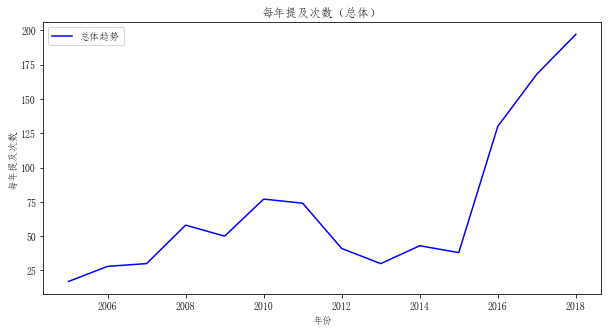

In [28]:
#总体画图
graph1 = raw[["year","polarity"]].groupby("year").count()

plt.figure(figsize=(10, 5))
plt.title("每年提及次数（总体）")
plt.plot(graph1.index,graph1.polarity,color="blue", label="总体趋势")
plt.legend()

plt.xlabel('年份')
plt.ylabel('每年提及次数')
plt.savefig("C:\Graph\每年提及次数（总体）.png")
plt.show()

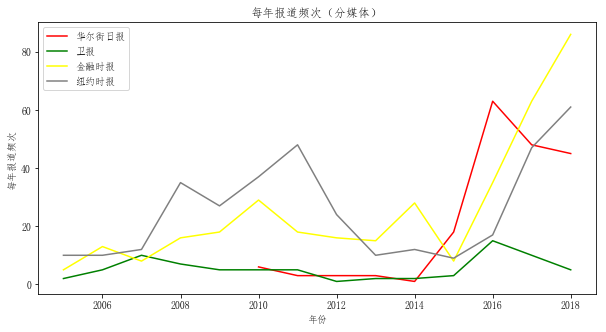

In [29]:
#分媒体画图
graph2 = HEJ[["year","polarity"]].groupby("year").count()
graph3 = WB[["year","polarity"]].groupby("year").count()
graph4 = JRSB[["year","polarity"]].groupby("year").count()
graphN = NY[["year","polarity"]].groupby("year").count()

plt.figure(figsize=(10, 5))
plt.title("每年报道频次（分媒体）")
plt.plot(graph2.index,graph2.polarity,color="red", label="华尔街日报")
plt.plot(graph3.index,graph3.polarity,color="green", label="卫报")
plt.plot(graph4.index,graph4.polarity,color="yellow", label="金融时报")
plt.plot(graphN.index,graphN.polarity,color="grey", label="纽约时报")
plt.legend()

plt.xlabel('年份')
plt.ylabel('每年报道频次')
plt.savefig("C:\Graph\每年报道频次（分媒体）.png")
plt.show()

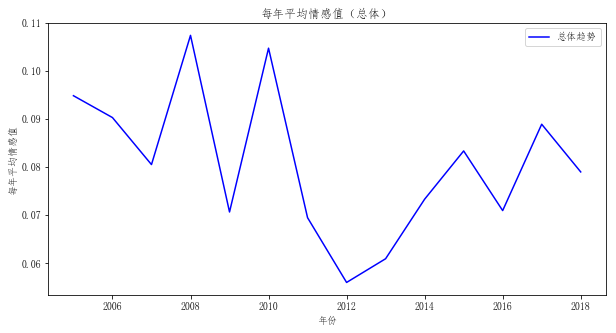

In [64]:
#总体画图
graph5 = raw[["year","polarity"]].groupby("year").mean()

plt.figure(figsize=(10, 5))
plt.title("每年平均情感值（总体）")
plt.plot(graph5.index,graph5.polarity,color="blue", label="总体趋势")
plt.legend()

plt.xlabel('年份')
plt.ylabel('每年平均情感值')
plt.savefig("C:\Graph\每年平均情感值（总体）.png")
plt.show()

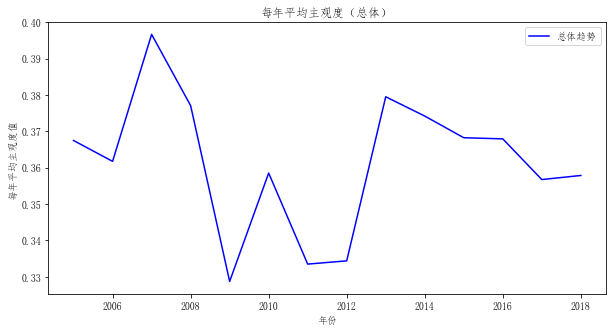

In [65]:
#总体画图
graph6 = raw[["year","subjectivity"]].groupby("year").mean()

plt.figure(figsize=(10, 5))
plt.title("每年平均主观度（总体）")
plt.plot(graph6.index,graph6.subjectivity,color="blue", label="总体趋势")
plt.legend()

plt.xlabel('年份')
plt.ylabel('每年平均主观度值')
plt.savefig("C:\Graph\每年平均主观度（总体）.png")
plt.show()

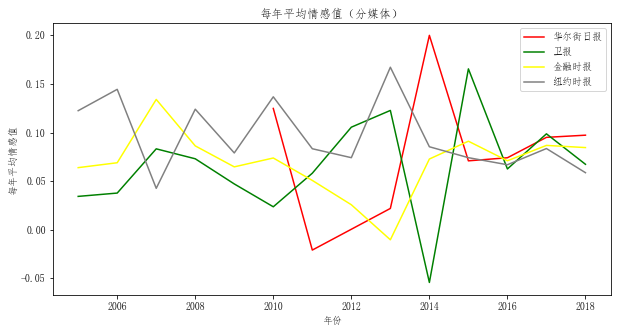

In [67]:
#分媒体画图
graph7 = HEJ[["year","polarity"]].groupby("year").mean()
graph8 = WB[["year","polarity"]].groupby("year").mean()
graph9 = JRSB[["year","polarity"]].groupby("year").mean()
graphN2 = NY[["year","polarity"]].groupby("year").mean()

plt.figure(figsize=(10, 5))
plt.title("每年平均情感值（分媒体）")
plt.plot(graph7.index,graph7.polarity,color="red", label="华尔街日报")
plt.plot(graph8.index,graph8.polarity,color="green", label="卫报")
plt.plot(graph9.index,graph9.polarity,color="yellow", label="金融时报")
plt.plot(graphN2.index,graphN2.polarity,color="grey", label="纽约时报")
plt.legend()

plt.xlabel('年份')
plt.ylabel('每年平均情感值')
plt.savefig("C:\Graph\每年平均情感值（分媒体）.png")
plt.show()

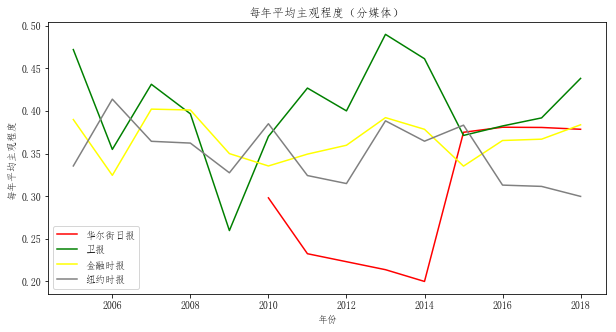

In [68]:
#分媒体画主观度的图
graph10 = HEJ[["year","subjectivity"]].groupby("year").mean()
graph11 = WB[["year","subjectivity"]].groupby("year").mean()
graph12 = JRSB[["year","subjectivity"]].groupby("year").mean()
graphN3 = NY[["year","subjectivity"]].groupby("year").mean()

plt.figure(figsize=(10, 5))
plt.title("每年平均主观程度（分媒体）")
plt.plot(graph10.index,graph10.subjectivity,color="red", label="华尔街日报")
plt.plot(graph11.index,graph11.subjectivity,color="green", label="卫报")
plt.plot(graph12.index,graph12.subjectivity,color="yellow", label="金融时报")
plt.plot(graphN3.index,graphN3.subjectivity,color="grey", label="纽约时报")
plt.legend()

plt.xlabel('年份')
plt.ylabel('每年平均主观程度')
plt.savefig("C:\Graph\每年平均主观程度（分媒体）.png")
plt.show()